### Feature 1 - Read data in from a local csv file - FETCH REWARDS SUMMARY

Use pandas library to read a csv file. Import pandas and numpy libraries for data analysis. Import matplotlib for data visualization.

In [20]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
monthly_budget = 900
df = pd.read_csv (r'FETCH REWARDS SUMMARY.csv') #read.csv file stored in capstone project folder
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print(f'Number of rows and columns: {str(rows)} and {str(cols)}')
print(df.head(5))
print(df.tail(5))

Number of rows and columns: 97 and 8
   TRANSACTION_NUMBER TRANSACTION_DATE     STORE_NAME  NUMBER_OF_ITEMS  \
0                   1       01/15/2022  REMKE MARKETS                9   
1                   2       01/15/2022            CVS                2   
2                   3       01/16/2022     APPLEBEE’S                9   
3                   4       01/18/2022            CVS                1   
4                   5       01/25/2022         COSTCO               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2                  72.98                    25                        N   
3                  10.91                    25                        N   
4                 501.94                   214                        Y   

  EXCEPTION  
0       NaN  
1       NaN  
2       NaN  
3       NaN

Print all the column name and the types of data for each column

In [41]:
index = [list(df.columns)]   
print(index)
print(df.dtypes)

[['TRANSACTION_NUMBER', 'TRANSACTION_DATE', 'STORE_NAME', 'NUMBER_OF_ITEMS', 'TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED', 'SPECIAL_OFFER_BONUS(Y/N)', 'EXCEPTION']]
TRANSACTION_NUMBER            int64
TRANSACTION_DATE             object
STORE_NAME                   object
NUMBER_OF_ITEMS               int64
TOTAL_AMOUNT_SPENT($)       float64
FETCH_REWARDS_EARNED          int64
SPECIAL_OFFER_BONUS(Y/N)     object
EXCEPTION                    object
dtype: object


Object Class

In [19]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Feature 2 - Manipulate and clean data

In [42]:
# format to correct datetime
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE']) 

#removing rows where fetch rewards=0 and replacing it with new dataframe
for rewards in df.index:
    if df.loc[rewards, 'FETCH_REWARDS_EARNED'] == 0: #remove rows where fetch rewards earned =0
        df.drop(rewards, inplace = True) #replace with new data 
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print(f'Number of rows and columns: {str(rows)} and {str(cols)}')
print(df.head(5))
print(df.tail(5))
print(df.dtypes)

Number of rows and columns: 89 and 8
   TRANSACTION_NUMBER TRANSACTION_DATE     STORE_NAME  NUMBER_OF_ITEMS  \
0                   1       2022-01-15  REMKE MARKETS                9   
1                   2       2022-01-15            CVS                2   
2                   3       2022-01-16     APPLEBEE’S                9   
3                   4       2022-01-18            CVS                1   
4                   5       2022-01-25         COSTCO               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2                  72.98                    25                        N   
3                  10.91                    25                        N   
4                 501.94                   214                        Y   

  EXCEPTION  
0       NaN  
1       NaN  
2       NaN  
3       NaN

### Feature 3 - Analyze data - FETCH REWARDS SUMMARY

Analyze data from January 2022 to September 2022 to see how much money is spent so far, what is the maximum and minimum, average cost of an item and average per transaction. Round the average to 2 decimal point. 

In [27]:
total_number_of_items_purchased = df['NUMBER_OF_ITEMS'].sum()
total_amount_spent = df['TOTAL_AMOUNT_SPENT($)'].sum()
maximum_amt_spent = df['TOTAL_AMOUNT_SPENT($)'].max()
minimum_amt_spent = df['TOTAL_AMOUNT_SPENT($)'].min()
average_amt_spent = round(df['TOTAL_AMOUNT_SPENT($)'].mean(), 2)
number_of_trans = df['TRANSACTION_NUMBER'].count()
average_cost_of_each_item = round(total_amount_spent / total_number_of_items, 2)
average_cost_per_transaction = round(total_amount_spent / number_of_trans, 2)

print(f'Total number of items purchased : {total_number_of_items_purchased}')
print(f'Total amount spent : $ {total_amount_spent}')
print(f'Maximum amount spent : ${maximum_amt_spent}')
print(f'Minimum amount spent : ${minimum_amt_spent}')
print(f'Average amount spent : ${average_amt_spent}')
print(f'Total number of transaction : {number_of_trans}')
print(f'Average cost of each item : ${average_cost_of_each_item}')
print(f'Average cost per transaction : ${average_cost_per_transaction}')

Total number of items purchased : 815
Total amount spent : $ 6508.27
Maximum amount spent : $501.94
Minimum amount spent : $0.31
Average amount spent : $73.13
Total number of transaction : 89
Average cost of each item : $7.99
Average cost per transaction : $73.13


Using groupby function to group all the transaction by month and print total amount spent that month, no. of items bought and see how many rewards points earned.


In [56]:
#prints month in jan-sept format but can't sort by month in ascending order
#monthly_expense = df.groupby(df['TRANSACTION_DATE'].dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']].sum()

monthly_expense_and_rewards = df.groupby(df.TRANSACTION_DATE.dt.month)[['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']].sum()
'''if monthly_expense <= monthly_budget:
    print('Great job! You stayed on budget')
else:
    print('!!!You went over budget!!!!')'''

print(monthly_expense_and_rewards)

                  TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED
TRANSACTION_DATE                                             
1                                819.93                   427
2                                639.11                   444
3                                492.14                   350
4                                858.99                  1255
5                                172.98                   150
6                                770.58                  1734
7                                362.64                   317
8                               1310.65                   801
9                               1081.25                   711


In [58]:
#getting storename, amount spent n no of items
total_spent_by_store_amount_items = df.loc[:,['STORE_NAME', 'TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS']] 

#info for specific store only like costco
total_spent_by_specific_store = total_spent_by_store_amount_items.loc[total_spent_by_store_amount_items ['STORE_NAME'] == 'REMKE MARKETS']


#print(total_spent_by_store_amount_items)
print(total_spent_by_specific_store)

       STORE_NAME  TOTAL_AMOUNT_SPENT($)  NUMBER_OF_ITEMS
0   REMKE MARKETS                  30.19                9
6   REMKE MARKETS                  14.72                4
7   REMKE MARKETS                 116.74               42
13  REMKE MARKETS                  26.56                4
14  REMKE MARKETS                  19.68                4
25  REMKE MARKETS                  30.19                9
55  REMKE MARKETS                 104.07               26
62  REMKE MARKETS                  49.62                8
67  REMKE MARKETS                  74.16               18
70  REMKE MARKETS                  44.10                7
71  REMKE MARKETS                   8.46                2
72  REMKE MARKETS                  85.38               24
74  REMKE MARKETS                  29.23                3
77  REMKE MARKETS                  17.99                5
90  REMKE MARKETS                  29.23                2


### Feature 4 - Visualize data (line chart) - MONTHLY EXPENSE VS REWARDS EARNED

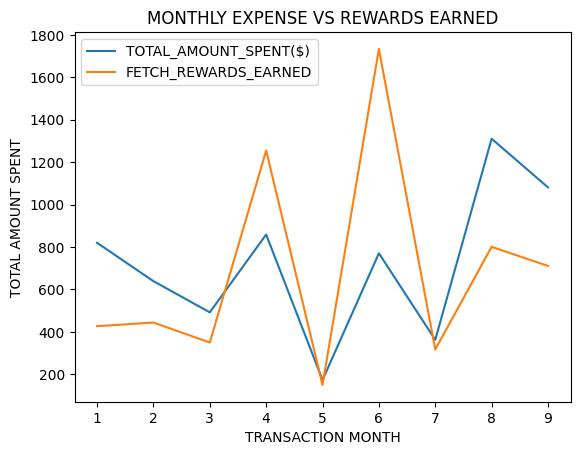

In [57]:

plt.plot(monthly_expense_and_rewards)
plt.xlabel('TRANSACTION MONTH')
plt.ylabel('TOTAL AMOUNT SPENT')
plt.title('MONTHLY EXPENSE VS REWARDS EARNED')
plt.legend(['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED'])

### Feature 5 - Interpretation of MONTHLY EXPENSE VS REWARDS EARNED DATA

Conclusion: From the table and chart above, we can see that 8 on transaction_date meaning August, we spent the most money and in May we spent least amount of money. But the rewards earned was highest in the month of June and lowest in the month of May.

### End

Extra things i want to do with data

In [9]:
from matplotlib import pyplot as plt
#df = pd.read_csv (r'FETCH REWARDS SUMMARY.csv')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#monthly_expense = df.groupby(df['TRANSACTION_DATE'].dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']].sum()
#monthly_expense = df.groupby(df['TRANSACTION_DATE'].dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']].sum()
#monthly_expense = df.groupby(df['TRANSACTION_DATE'].dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']].sum()
#monthly_expense = df.groupby(df['TRANSACTION_DATE'].dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']].sum()
#df['months'] = df['TRANSACTION_DATE'].dt.month


#df['months'] = pd.Categorical(df['TRANSACTION_DATE'], categories=months, ordered=True)
#print(df)
#df.sort_values(...)  # same as you have now; can use inplace=True

#BY_MONTH = (df['TRANSACTION_DATE'].dt.strftime('%B')), assending

monthly_expense = df.groupby(df.TRANSACTION_DATE.dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']].sum()

#monthly_expense = df.groupby(df.TRANSACTION_DATE.dt.month)['TOTAL_AMOUNT_SPENT($)'].sum() #df.groupby(df['TRANSACTION_DATE'].dt.strftime('%B'))['TOTAL_AMOUNT_SPENT($)', 'TRANSACTION_DATE'].sum().sort_values(by=['TRANSACTION_DATE'], ascending= True)



#monthly_expense_by_month = monthly_expense.sort_values()
#print(monthly_expense_by_month)
print(monthly_expense)
#print(BY_MONTH)
#plt.plot(monthly_expense_by_month)
'''plt.plot(monthly_expense)
plt.xlabel('TRANSACTION MONTH')
plt.ylabel('TOTAL AMOUNT SPENT')
plt.title('MONTHLY EXPENSE REPORT')
plt.legend(['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED'])'''

                  TOTAL_AMOUNT_SPENT($)  NUMBER_OF_ITEMS  FETCH_REWARDS_EARNED
TRANSACTION_DATE                                                              
April                            858.99              111                  1255
August                          1310.65              127                   801
February                         639.11               71                   444
January                          819.93              109                   427
July                             362.64               81                   317
June                             770.58               87                  1734
March                            492.14              102                   350
May                              172.98                6                   150
September                       1081.25              121                   711


"plt.plot(monthly_expense)\nplt.xlabel('TRANSACTION MONTH')\nplt.ylabel('TOTAL AMOUNT SPENT')\nplt.title('MONTHLY EXPENSE REPORT')\nplt.legend(['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED'])"

In [26]:
#expenses_by_store = df.groupby(df['STORE_NAME'])[['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']].sum().sort_values(by='STORE_NAME')
'''expenses_by_store = df.groupby(df['STORE_NAME'])#[['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']].sum().sort_values(by='STORE_NAME')
for name, group in expenses_by_store:
    print(name)
    print(expenses_by_store)
    print()
#print(expenses_by_store)
'''



APPLEBEE’S

BATH & BODY WORKS

BURGER KING

CARTER’S SUPERMARKET

CENTRAL MARKET

CITY BIRD

COLD STONE CREAMERY

COSTCO

COSTCO FUEL

CVS

DILLARD’S

DOMINO’S PIZZA

FAMILY PRACTICE CENTER

J.CREW

KROGER

MACY’S

MAHARAJA INTERNATIONAL GROCERY

MAI THAI RESTAURANT SUSHI BAR

MCDONALD’S

OLIVE GARDEN

PANERA

PAY EACH TIME YOU PARK

REMKE MARKETS

SHELL

SPEEDWAY

STARBUCKS

SUPER QUIK

TARGET

THAWNG ASIAN GROCERY

THE CHEESECAKE FACTORY

THE HOME DEPOT

USPS

VICTORIA’S SECRET



In [14]:
total_spent_by_store_amount_items = df.loc[:,['STORE_NAME', 'TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS']] #geting storename, amount spent n no of items
total_spent_by_specific_store = total_spent_by_specific_store_amount.loc[total_spent_by_specific_store_amount['STORE_NAME'] == 'COSTCO'] #info for specific store only like costco
#df.loc[:,'Country':'Units Sold']
#[['TOTAL_AMOUNT_SPENT($)', 'NUMBER_OF_ITEMS', 'FETCH_REWARDS_EARNED']]
 # sum by each store
#kenton_county_schools = dataset.loc[dataset['COUNTY NAME'] == 'KENTON']
#print(f'Total spent by store{total_spent_by_specific_store}')
print(total_spent_by_store_amount_items)
print(total_spent_by_specific_store)

                        STORE_NAME  TOTAL_AMOUNT_SPENT($)  NUMBER_OF_ITEMS
0                    REMKE MARKETS                  30.19                9
1                              CVS                  22.87                2
2                       APPLEBEE’S                  72.98                9
3                              CVS                  10.91                1
4                           COSTCO                 501.94               41
..                             ...                    ...              ...
92                        SPEEDWAY                  54.90                1
93                      MCDONALD’S                  10.15                2
94                          COSTCO                 203.04               18
95                          KROGER                  61.40               12
96  MAHARAJA INTERNATIONAL GROCERY                  42.59                7

[89 rows x 3 columns]
   STORE_NAME  TOTAL_AMOUNT_SPENT($)  NUMBER_OF_ITEMS
4      COSTCO          

I want to categorize the stores into grocery, gas, restaurants, etc..

In [59]:
total_spent_by_store = df.groupby(['STORE_NAME'])['FETCH_REWARDS_EARNED'].sum() # sum by each store
print(total_spent_by_store)

STORE_NAME
APPLEBEE’S                          25
BATH & BODY WORKS                   25
BURGER KING                         25
CARTER’S SUPERMARKET                25
CENTRAL MARKET                      35
CITY BIRD                           25
COLD STONE CREAMERY                 25
COSTCO                            1681
COSTCO FUEL                         50
CVS                                447
DILLARD’S                           25
DOMINO’S PIZZA                      25
FAMILY PRACTICE CENTER              50
J.CREW                              25
KROGER                            1266
MACY’S                              50
MAHARAJA INTERNATIONAL GROCERY      50
MAI THAI RESTAURANT SUSHI BAR       25
MCDONALD’S                          50
OLIVE GARDEN                       350
PANERA                              25
PAY EACH TIME YOU PARK              25
REMKE MARKETS                      450
SHELL                               25
SPEEDWAY                           400
STARBUCKS     